In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import warnings 
warnings.filterwarnings("ignore") 

In [4]:
df=pd.read_csv("C:\\Users\\amitk\\OneDrive\\Desktop\\haberman.csv")

In [5]:
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
df.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [7]:
print(df.shape)

(306, 4)


In [8]:
print(df.shape[1])

4


In [9]:
print(df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [10]:
print(df['status'].nunique())
print(df['status'].unique())

2
[1 2]


In [11]:
print(df['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


# OBSERVATIONS:

1. there are 306 data points are present in the data set.
2. data set consist of 3 input variable(age , year ,nodes) and one output variable(status).
3. ouput variable has 2 class label(1,2).
4. it is a inbalanced data set.
5. the data set consist patients survied for 5 years or more large in number.

# Bi-variate analysis
# 2D scatter plot

<Figure size 432x288 with 0 Axes>

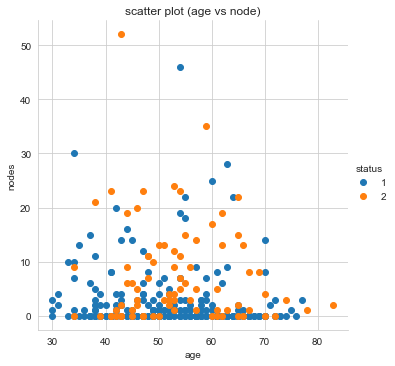

In [12]:
plt.figure()
sns.set_style("whitegrid")
g=sns.FacetGrid(df,hue="status",size=5)
g.map(plt.scatter,'age','nodes')
plt.title("scatter plot (age vs node)")
g.add_legend()

# Pair Plot

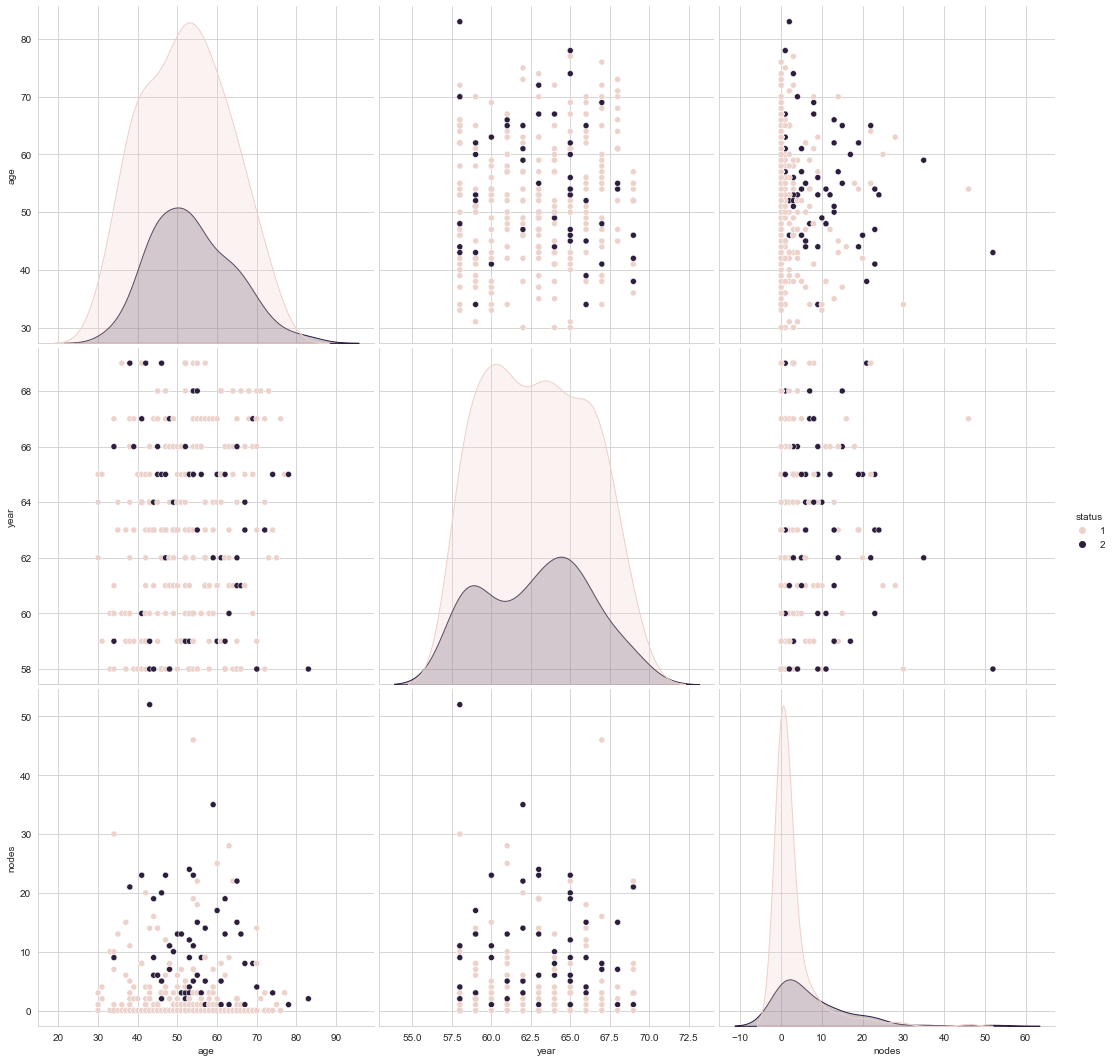

In [13]:
sns.pairplot(df,hue="status",vars=["age","year","nodes"],size=5)

# OBSERVATIONS:

1.from above plot we not getting any useful information.
2.all data points are spread across in the status labels.

# Uni-variate
# Histogram


Text(0.5, 1.0, 'Histogram Of Age')

<Figure size 432x288 with 0 Axes>

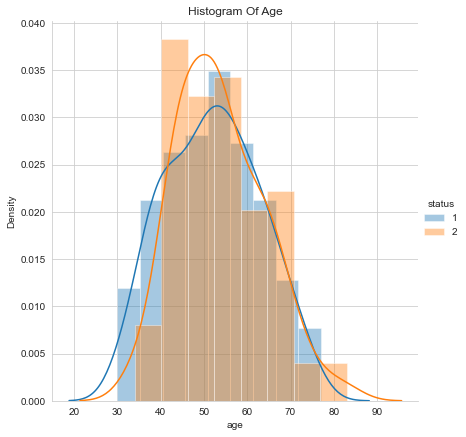

In [14]:
plt.figure()
g=sns.FacetGrid(df,hue="status",size=6)
g.map(sns.distplot,"age")
g.add_legend()
plt.title("Histogram Of Age")

<Figure size 432x288 with 0 Axes>

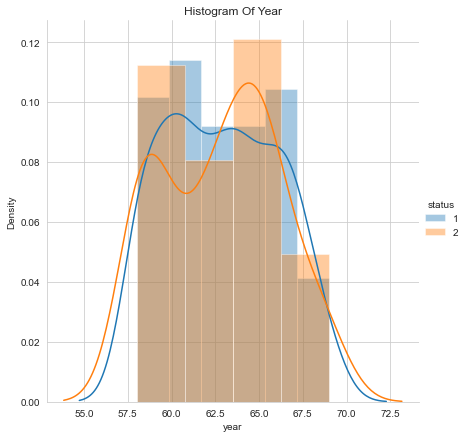

In [15]:
plt.figure()
g=sns.FacetGrid(df,hue="status",size=6)
g.map(sns.distplot,"year")
plt.title("Histogram Of Year")
g.add_legend()

<Figure size 432x288 with 0 Axes>

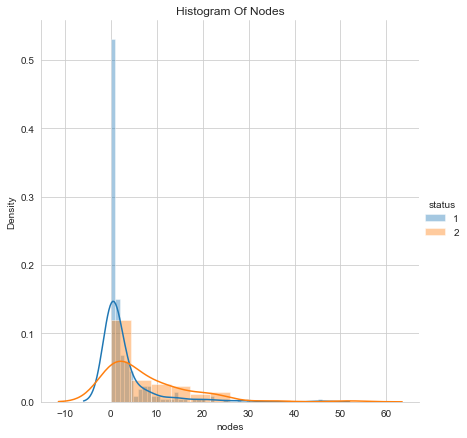

In [16]:
plt.figure()
g=sns.FacetGrid(df,hue="status",size=6)
g.map(sns.distplot,"nodes")
plt.title("Histogram Of Nodes")
g.add_legend()

# PDF & CDF



In [17]:
df_1 = df.loc[df["status"] == 1]
df_2 = df.loc[df["status"] == 2]

In [18]:
from statsmodels import robust

bin edges [ 4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
 
probability density function
 
[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
 
Cumulative distribution function
 
[0.83555556 0.91555556 0.93777778 0.96444444 0.98222222 0.98666667
 0.99555556 0.99555556 0.99555556 1.        ]


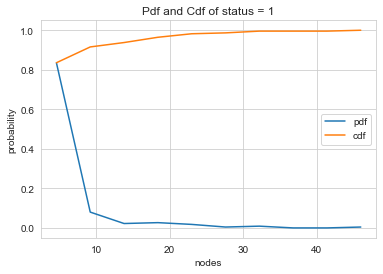

In [21]:
count,edges=np.histogram(df_1['nodes'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf,label="pdf")
plt.plot(edges[1:],cdf,label="cdf")
plt.ylabel("probability")
plt.xlabel("nodes")
plt.title("Pdf and Cdf of status = 1")
plt.legend()

bin edges [ 5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]
 
probability density function
 
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
 
Cumulative distribution function
 
[0.56790123 0.71604938 0.85185185 0.90123457 0.97530864 0.97530864
 0.98765432 0.98765432 0.98765432 1.        ]


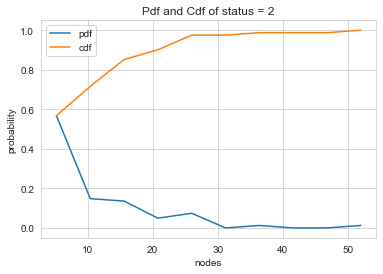

In [22]:
count,edges=np.histogram(df_2['nodes'],bins=10,density=True)
pdf=count/sum(count)
cdf=np.cumsum(pdf)
print("bin edges",edges[1:])
print(" ")
print("probability density function")
print(" ")
print(pdf)
print(" ")
print("Cumulative distribution function")
print(" ")
print(cdf)
plt.plot(edges[1:],pdf,label="pdf")
plt.plot(edges[1:],cdf,label="cdf")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.title("Pdf and Cdf of status = 2")
plt.legend()

# Box plot


<AxesSubplot:title={'center':'Box Plot (status vs nodes)'}, xlabel='status', ylabel='nodes'>

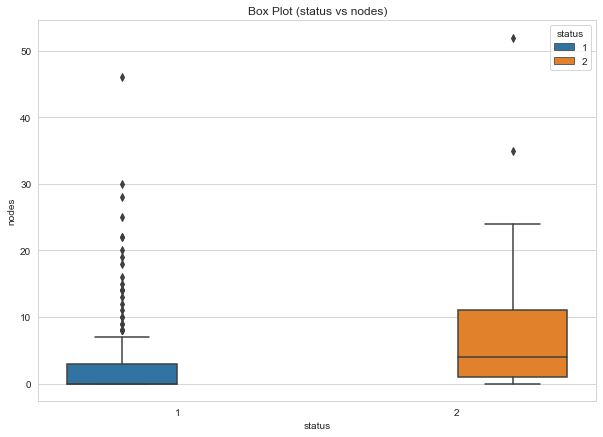

In [23]:
plt.figure(figsize=(10,7))
plt.title("Box Plot (status vs nodes)")
sns.boxplot(data=df,x='status',y='nodes',hue='status')

# Violin Plot

<AxesSubplot:title={'center':'Violin Plot (status vs nodes)'}, xlabel='status', ylabel='nodes'>

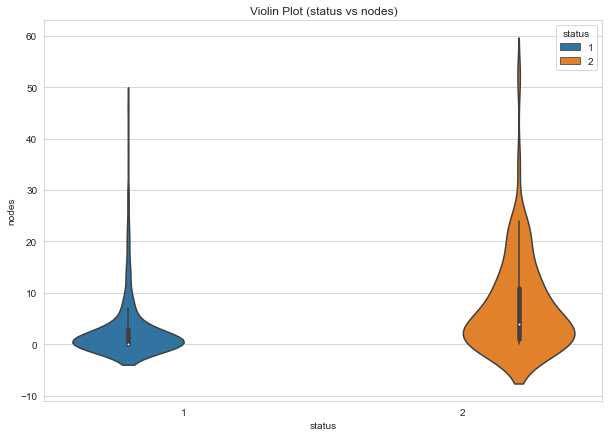

In [24]:
plt.figure(figsize=(10,7))
plt.title("Violin Plot (status vs nodes)")
sns.violinplot(data=df,x='status',y='nodes',hue='status')

# Mean , Std , Median , Percentile , Quantiles and Mad

In [25]:
from statsmodels import robust

In [26]:
print("************************STATUS 1****************************")
print(" ")
print("mean =",np.mean(df_1['nodes']))
print(" ")
print("standard deviation =",np.std(df_1['nodes']))
print(" ")
print("median =",np.median(df_1['nodes']))
print(" ")
print("90th percentile =",np.percentile(df_1['nodes'],90))
print(" ")
print("quantiles (25%, 50% and 75%) =",np.percentile(df_1['nodes'],np.arange(25,100,25)))
print(" ")
print("median absolute deviation",robust.mad(df_1["nodes"]))

************************STATUS 1****************************
 
mean = 2.7911111111111113
 
standard deviation = 5.857258449412131
 
median = 0.0
 
90th percentile = 8.0
 
quantiles (25%, 50% and 75%) = [0. 0. 3.]
 
median absolute deviation 0.0


In [27]:
print("************************STATUS 2****************************")
print(" ")
print("mean =",np.mean(df_2['nodes']))
print(" ")
print("standard deviation =",np.std(df_2['nodes']))
print(" ")
print("median =",np.median(df_2['nodes']))
print(" ")
print("90th percentile =",np.percentile(df_2['nodes'],90))
print(" ")
print("quantiles (25%, 50% and 75%) =",np.percentile(df_2['nodes'],np.arange(25,100,25)))
print(" ")
print("median absolute deviation",robust.mad(df_2["nodes"]))

************************STATUS 2****************************
 
mean = 7.45679012345679
 
standard deviation = 9.128776076761632
 
median = 4.0
 
90th percentile = 20.0
 
quantiles (25%, 50% and 75%) = [ 1.  4. 11.]
 
median absolute deviation 5.930408874022408


In [28]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [29]:
df_0=df.loc[df['nodes']<=0]

In [30]:
df_0.shape

(136, 4)

# Count Plot

Text(0.5, 1.0, 'count plot of node =0')

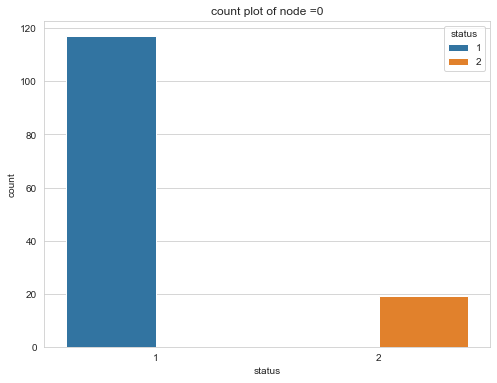

In [31]:
plt.figure(figsize=(8,6))
sns.countplot(x="status",data=df_0,hue="status")
plt.title("count plot of node =0")